In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(data.table)
library(corrplot)
library(lubridate)
library(RColorBrewer)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
df <- read.csv("/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv")

In [3]:
head(df)

,Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
3,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [4]:
trimmed_flavors_df <- df %>% select(Rating, Cocoa.Percent, Company...Maker.if.known.)

In [5]:
trimmed_flavors_df

Rating,Cocoa.Percent,Company...Maker.if.known.
<dbl>,<chr>,<chr>
3.75,63%,A. Morin
2.75,70%,A. Morin
3.00,70%,A. Morin
3.50,70%,A. Morin
3.50,70%,A. Morin
2.75,70%,A. Morin
3.50,70%,A. Morin
3.50,70%,A. Morin
3.75,70%,A. Morin


In [6]:
library(dplyr)

df %>%
  summarize(mean_rating = mean(Rating))

mean_rating
<dbl>
3.185933


In [7]:
library(dplyr)

best_trimmed_flavors_df <- df %>%
  filter(Cocoa.Percent >= 80, Rating >= 3.75)

In [8]:
best_trimmed_flavors_df

Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
Chocolate Makers,"Peru, Awagum bar",1530,2015,80%,Amsterdam,3.75,Criollo,Peru
"Chocolate Tree, The",Carenero Superior,1582,2015,80%,Scotland,3.75,Trinitario,Venezuela
Ethereal,Dominican Republic,1275,2014,80%,U.S.A.,3.75,,Dominican Republic
Potomac,"Upala, Batch 12",607,2010,82%,U.S.A.,3.75,Matina,Costa Rica
Pralus,Fortissima,93,2006,80%,France,4.00,"Criollo, Trinitario",Ecuador
Rogue,Porcelana,1209,2014,80%,U.S.A.,3.75,Criollo,Venezuela
Soma,Crazy 88,1077,2013,88%,Canada,4.00,,"Guat., D.R., Peru, Mad., PNG"
Videri,Dark,1117,2013,90%,U.S.A.,3.75,,Central and S. America


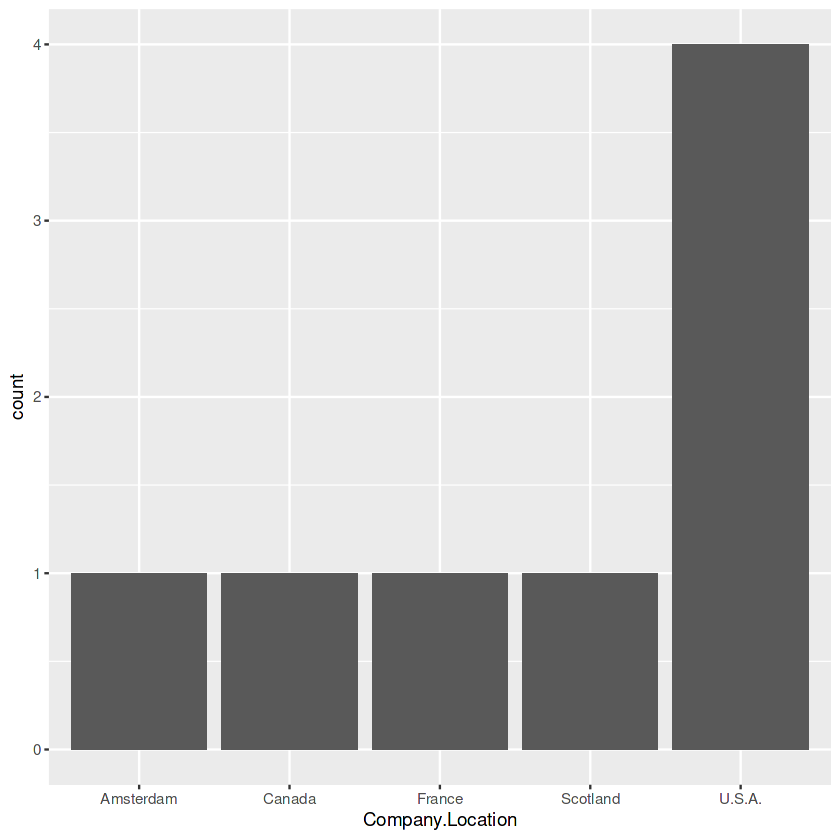

In [9]:
ggplot(data = best_trimmed_flavors_df) +
  geom_bar(mapping = aes(x = Company.Location))

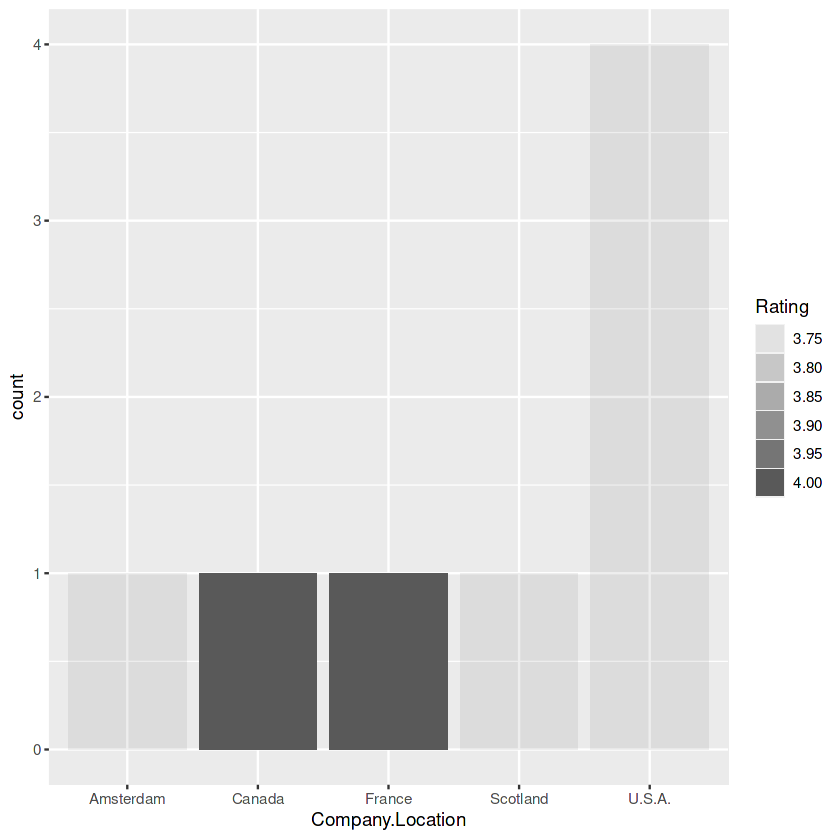

In [10]:
ggplot(data = best_trimmed_flavors_df) +
  geom_bar(mapping = aes(x = Company.Location, alpha = Rating))